In [393]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [394]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Load Data
---

In [395]:
travel_train_file = "../data/Traveldata_train.csv"
travel_test_file = "../data/Traveldata_test.csv"

survey_train_file = "../data/Surveydata_train.csv"
survey_test_file = "../data/Surveydata_test.csv"

In [396]:
travel_train = pd.read_csv(travel_train_file)
travel_test = pd.read_csv(travel_test_file)

survey_train = pd.read_csv(survey_train_file)
survey_test  = pd.read_csv(survey_test_file)

In [397]:
print(f"Travel Train shape: {travel_train.shape}")
print(f"Travel Test shape: {travel_test.shape}")
print(f"Survey Train shape: {survey_train.shape}")
print(f"Survey Test shape: {survey_test.shape}")

Travel Train shape: (94379, 9)
Travel Test shape: (35602, 9)
Survey Train shape: (94379, 17)
Survey Test shape: (35602, 16)


## Data Info
---

In [398]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [399]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [400]:
merged = travel_train.merge(survey_train, how='inner', on="ID")
merged.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## EDA
---

### Univariate Analysis

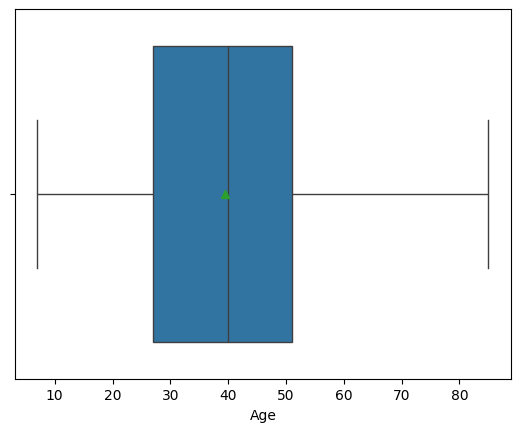

In [401]:
sns.boxplot(data=merged, x="Age", showmeans=True)
plt.show()

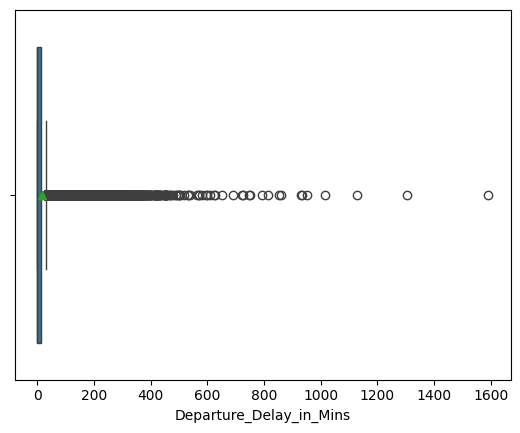

In [402]:
sns.boxplot(data=merged, x='Departure_Delay_in_Mins', showmeans=True)
plt.show()

### Bivariate Analysis

In [403]:
# plt.figure(figsize=(20, 8))
# sns.heatmap(merged.corr(), annot=True, vmin=-1, center=0, vmax=1, cmap="Spectral")
# plt.show()

## Data preprocessing
---

In [404]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [405]:
merged.isna().sum() 

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### Imputation

In [406]:
def impute_data(data):
    data['Type_Travel'] = data['Type_Travel'].fillna(str(data['Type_Travel'].mode()))
    data['Gender'] = data['Gender'].fillna("Unknown")
    data['Customer_Type'] = data['Customer_Type'].fillna(str(data['Customer_Type'].mode())) 
    data['Departure_Delay_in_Mins'] = data['Departure_Delay_in_Mins'].fillna(data['Departure_Delay_in_Mins'].mean())
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['Arrival_Delay_in_Mins'] = data['Arrival_Delay_in_Mins'].fillna(data['Arrival_Delay_in_Mins'].mean())
    data['Seat_Comfort'] = data['Seat_Comfort'].fillna(str(data['Seat_Comfort'].mode()))
    data['Arrival_Time_Convenient'] = data['Arrival_Time_Convenient'].fillna(str(data['Arrival_Time_Convenient'].mode()))
    data['Catering'] = data['Catering'].fillna(str(data['Catering'].mode()))
    data['Platform_Location'] = data['Platform_Location'].fillna(str(data['Platform_Location'].mode()))
    data['Onboard_Wifi_Service'] = data['Onboard_Wifi_Service'].fillna(str(data['Onboard_Wifi_Service'].mode()))
    data['Onboard_Entertainment'] = data['Onboard_Entertainment'].fillna(str(data['Onboard_Entertainment'].mode()))
    data['Onboard_Service'] = data['Onboard_Service'].fillna(str(data['Onboard_Service'].mode()))
    data['Legroom'] = data['Legroom'].fillna(str(data['Legroom'].mode()))
    data['Baggage_Handling'] = data['Baggage_Handling'].fillna(str(data['Baggage_Handling'].mode()))
    data['CheckIn_Service'] = data['CheckIn_Service'].fillna(str(data['CheckIn_Service'].mode()))
    data['Cleanliness'] = data['Cleanliness'].fillna(str(data['Cleanliness'].mode()))
    data['Online_Boarding'] = data['Online_Boarding'].fillna(str(data['Online_Boarding'].mode()))
    data['Ease_of_Online_Booking'] = data['Ease_of_Online_Booking'].fillna(str(data['Ease_of_Online_Booking'].mode()))
    data['Online_Support'] = data['Online_Support'].fillna(str(data['Online_Support'].mode()))
    return data

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [408]:
merged = impute_data(merged)

In [409]:
num_cols = merged.select_dtypes(include='number').drop(['Overall_Experience', "ID"], axis=1).columns.tolist()
merged[num_cols] = scaler.fit_transform(merged[num_cols])

In [410]:
merged.isna().any()

ID                         False
Gender                     False
Customer_Type              False
Age                        False
Type_Travel                False
Travel_Class               False
Travel_Distance            False
Departure_Delay_in_Mins    False
Arrival_Delay_in_Mins      False
Overall_Experience         False
Seat_Comfort               False
Seat_Class                 False
Arrival_Time_Convenient    False
Catering                   False
Platform_Location          False
Onboard_Wifi_Service       False
Onboard_Entertainment      False
Online_Support             False
Ease_of_Online_Booking     False
Onboard_Service            False
Legroom                    False
Baggage_Handling           False
CheckIn_Service            False
Cleanliness                False
Online_Boarding            False
dtype: bool

In [411]:
for col in merged.select_dtypes(include='object').columns:
    merged[col] = merged[col].astype('category')
    merged[col] = merged[col].cat.codes
merged.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,2,0.832369,0,0,-1.660469,-0.384165,-0.260781,0,5,0,2,2,5,4,5,1,5,5,1,4,4,5,6
1,98800002,1,2,0.567712,2,1,0.215099,-0.148112,-0.391103,0,6,1,2,6,4,4,6,4,4,2,5,5,5,4,4
2,98800003,0,2,0.236891,1,0,-0.892926,1.635398,2.710567,1,5,0,5,5,4,5,4,2,2,2,2,2,4,2,2
3,98800004,0,2,0.303056,1,0,-1.166284,-0.043200,0.078057,0,1,1,5,0,4,1,5,1,1,1,1,1,4,1,1
4,98800005,0,2,0.700041,1,0,0.002054,-0.384165,-0.391103,1,1,1,1,1,3,5,4,2,4,4,4,3,4,4,4


In [412]:
merged_test = travel_test.merge(survey_test, how='inner', on='ID')

In [413]:
num_cols = merged_test.select_dtypes(include='number').drop(["ID"], axis=1).columns.tolist()
merged_test[num_cols] = scaler.fit_transform(merged_test[num_cols])

In [414]:
merged_test = impute_data(merged_test)

In [415]:
for col in merged_test.select_dtypes(include='object').columns:
    merged_test[col] = merged_test[col].astype('category')
    merged_test[col] = merged_test[col].cat.codes
merged_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,0,0,-0.227715,1,0,-1.420638,-0.392683,-0.397314,1,0,1,1,3,5,2,3,2,2,2,2,3,2,6
1,99900002,0,1,-1.218642,1,0,-0.548819,-0.155184,0.329378,3,1,4,6,3,1,6,1,1,2,1,3,1,2,1
2,99900003,1,2,1.357768,1,0,0.824810,-0.392683,-0.397314,2,1,2,2,5,2,2,2,5,4,5,4,3,4,2
3,99900004,0,2,-0.690147,2,1,-0.620087,-0.392683,-0.397314,1,0,2,1,5,6,1,2,6,1,5,2,2,2,6
4,99900005,1,1,-1.416827,1,0,-0.368206,0.055926,-0.397314,2,1,3,2,4,2,2,2,2,0,1,2,2,2,2


## Modeling
---

In [416]:
from xgboost import XGBClassifier

In [417]:
X = merged.drop(columns=['Overall_Experience'], axis=1)
y = merged['Overall_Experience']

In [418]:
xgb = XGBClassifier()

### Evaluation

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(75503, 24)

In [420]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [421]:
accuracy_score(y_test, xgb.predict(X_test))

0.9527442254714982

In [422]:
merged_test = impute_data(merged_test)

In [423]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Galaxy', 'Quasar', 'Star'], yticklabels = ['Galaxy', 'Quasar', 'Star'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     34381
           1       0.98      0.97      0.98     41122

    accuracy                           0.97     75503
   macro avg       0.97      0.97      0.97     75503
weighted avg       0.97      0.97      0.97     75503



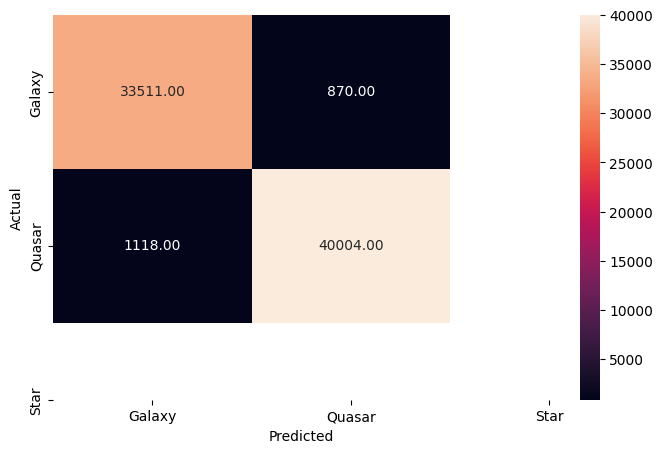

In [424]:
metrics_score(y_train, xgb.predict(X_train))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



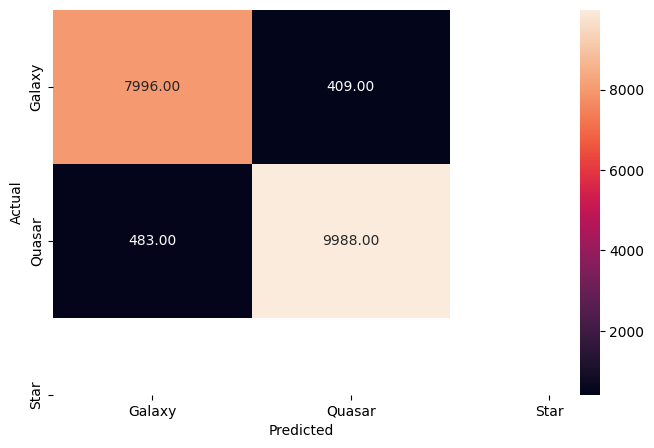

In [425]:
metrics_score(y_test, xgb.predict(X_test))

## Optunaing
---

In [426]:
import optuna

def objective(trial):
    # Define parameters to be optimized
    params = {
        'objective': 'multi:softmax',
        'num_class': 3,  # Number of classes in the dataset
        'eval_metric': 'merror',
        'booster': 'gbtree',
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-9, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 100.0),
        'random_state': 42
    }

    # Train XGBoost model
    model = XGBClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

    # Predict on validation set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

if __name__ == "__main__":
    # Create a study object and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=150)

    # Print the best trial
    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial_xgb = study.best_trial
    print("  Value: ", trial_xgb.value)
    print("  Params: ")
    for key, value in trial_xgb.params.items():
        print("    {}: {}".format(key, value))

[I 2024-04-14 23:43:59,816] A new study created in memory with name: no-name-ab3ddad7-0e6c-4302-8d19-e057f1e2e1d5
[I 2024-04-14 23:44:13,424] Trial 0 finished with value: 0.9537507946598855 and parameters: {'n_estimators': 810, 'max_depth': 8, 'learning_rate': 0.015128264261834562, 'subsample': 0.6348795028675603, 'colsample_bytree': 0.7238486484712734, 'gamma': 0.7139251824177025, 'min_child_weight': 2.5270170305295143, 'reg_alpha': 1.1535157615398758e-07, 'reg_lambda': 0.06472471378179262}. Best is trial 0 with value: 0.9537507946598855.
[I 2024-04-14 23:44:19,140] Trial 1 finished with value: 0.9556579783852511 and parameters: {'n_estimators': 644, 'max_depth': 8, 'learning_rate': 0.05892386892047053, 'subsample': 0.9059003930980807, 'colsample_bytree': 0.8340866032241332, 'gamma': 0.42375750885395613, 'min_child_weight': 1.6680493506878729, 'reg_alpha': 7.12889019443858e-05, 'reg_lambda': 1.4437536692999125e-05}. Best is trial 1 with value: 0.9556579783852511.
[I 2024-04-14 23:44:3

Number of finished trials:  150
Best trial:
  Value:  0.958041958041958
  Params: 
    n_estimators: 608
    max_depth: 10
    learning_rate: 0.09243031775796517
    subsample: 0.9628208860251418
    colsample_bytree: 0.6397799577894924
    gamma: 0.03831225515360645
    min_child_weight: 1.9535245422269458
    reg_alpha: 1.3656450764902877e-08
    reg_lambda: 0.11165159992417581


In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [428]:
best_params_xgb = trial_xgb.params
# best_params_rf = trial_rf.params

In [429]:
xgb_final = XGBClassifier(**best_params_xgb, random_state=42)
# rf_final = RandomForestClassifier(**best_params_rf, random_state=42)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6397799577894924, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.03831225515360645,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09243031775796517,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1.9535245422269458, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=608,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [430]:
# from sklearn.ensemble import VotingClassifier
# clf_voting = VotingClassifier(
# 	estimators=[
# 		('xgb', xgb_final),
# 		('rf', rf_final)
#     ]
# )

In [431]:
# clf_voting.fit(X_train, y_train)

In [432]:
# metrics_score(y_train, clf_voting.predict(X_train))

In [433]:
# metrics_score(y_test, clf_voting.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



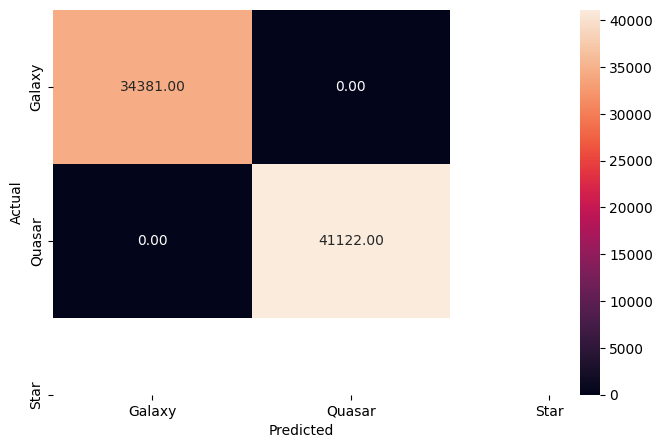

In [434]:
metrics_score(y_train, xgb_final.predict(X_train))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.97      0.95      0.96     10471

    accuracy                           0.96     18876
   macro avg       0.95      0.96      0.95     18876
weighted avg       0.96      0.96      0.96     18876



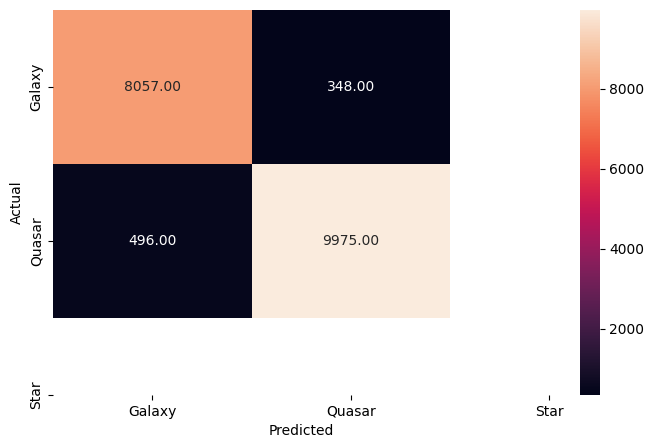

In [435]:
metrics_score(y_test, xgb_final.predict(X_test))

### Feature Importance

In [436]:
# # Plotting the feature importance
# importances = xgb.feature_importances_
# columns = X.columns;
# importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
# plt.figure(figsize=(13,13));
# sns.barplot(x=importance_df.Importance, y=importance_df.index)
# plt.show()

# print(importance_df)

- Most important feature's is onboard_entertainment itself, seat_comfort, ease of online booking, travel class, custoemer type, and type of travel. 
- Maybe we can improve seat comfort by implementing new seats, or known comfortable seats. I thought this would have to do with leg room, but the correlation between those two variables is not really that positively high, but its still a positive correlation. So, we could say that the leg room of these passengers might make them uncomfortable if there is not that much space. 
- The more easy it is to board online, the less worried passengers will be
- It's known that the higher the travel_class, the higher the passengers will be satisfied. Maybe we can put more ammenities for lower classes but still maintain what the higher class paid for.

In [437]:
# important_cols = importance_df[importance_df['Importance'] > 0.025]
# important_cols = important_cols.index.tolist()
# important_cols

In [438]:
# X_train_imp = X_train[important_cols]
# X_test_imp  = X_test[important_cols]

In [439]:
# xgb_final.fit(X_train_imp, y_train)

In [440]:
# metrics_score(y_test, xgb_final.predict(X_test_imp))

In [441]:
merged_test['Overall_Experience'] = xgb_final.predict(merged_test)

In [442]:
submission = merged_test[['ID', "Overall_Experience"]].set_index('ID')

In [443]:
submission.to_csv('../submission/submission.csv')